## Exercise 8: Epidemic Spreading

Today we are going to simulate SI models on random networks. We will write some functions to simulate spreading and compare how network topology influences spreading.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

### Task 1: Initializing a Graph

__a)__ Write a function that takes as input a networkx graph ```G``` and adds a node attribute to every node which represents whether the corresponding node is infected or susceptible - the values can be either 0 for _susceptible_, or 1 for _infected_. In the initialization, only one node - our patient zero - should be infected, and the rest should be left susceptible. Use the signature specified in the cell below!

In [2]:
def initialize_graph(G, attr="state"):
    """
    :param G: networkx graph
    :param attr: string specifying the node attribute 
    :
    :return: resulting networkx graph
    """
    # your code here
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    H = G.subgraph(Gcc[0])
    intialization={node: 0 for node in G.nodes()} #susceptible
    nx.set_node_attributes(H,intialization,attr)
    patient_zero=random.choice(list(H.nodes())) #randomly select a node
    H.nodes[patient_zero][attr]=1 #change its state to 1 - infected
    return H

__b)__ Apply your function from a) on an Erdos-Renyi-Graph with $N=200$ nodes and $p=0.05$. Draw the graph in a way that all susceptible nodes are colored green, and all infected nodes are colored red!

In [3]:
# helper function to plot the spreading over the network

def plot_spreading(G,attr='state'):
    plt.figure(figsize=(5,5))
    color_map = {}
    for node in G.nodes():
        if G.nodes[node][attr] ==0:
            color_map[node]='green'
        else:
            color_map[node]='red'
    positions = nx.spring_layout(G, seed = 12) #set positions
    nx.draw(G,pos=positions,node_color = list(color_map.values()),node_size=100)
    plt.show()

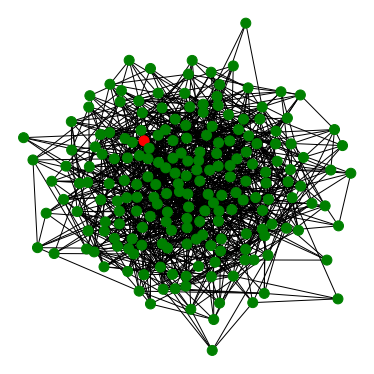

In [4]:
G = nx.erdos_renyi_graph(200,.05)
H=initialize_graph(G)
plot_spreading(H)

### Task 2: Simulating the SI model

__a)__ Write a function that simulates one step of the spreading according to the SI model, using the signature in the cell below!

In [5]:
def spread_SI(G, beta, attr="state"):
    """
    :param G: networkx graph
    :param beta: probability that an infected individual infects one of his neighbors 
    :param attr: string specifying the node attribute which indicates whether or not
    :            the corresponding individual is infected
    :            -> should take value 0 if the corresponding individual susceptible, and 1 if the individual is infected
    :
    :return: nothing, input graph G should be edited in-place, i.e. as a side-effect!
    """
    # your code here
    node_states=nx.get_node_attributes(G,attr)
    for v in G.nodes():
        if node_states[v]==0:
            for w in G[v]:
                if G.nodes[w][attr]==1:
                    if random.random() < beta:
                        node_states[v]=1
                        break
    nx.set_node_attributes(G,node_states,attr)

__b)__ Apply your implementation from a) to simulate the spreading of an infection according to the SI model. First visualize the spreading by drawing the network with $\beta=1$ for 5 time steps, then simulate the spreading within the first 20 time steps on the same initial random graph created in task 1, for different values $\beta \in\{ 0.1,0.2,\dots,1\}$.
At each step compute the fraction of nodes that are currently infected, and plot this fraction against the number of time steps for each value of $\beta$! Use the same plot for all of the resulting curves.

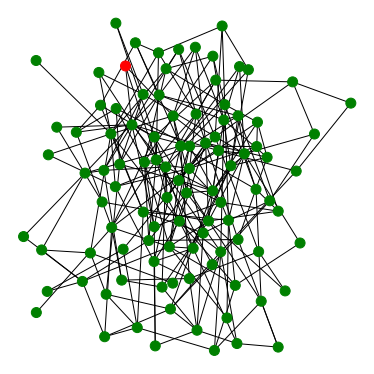

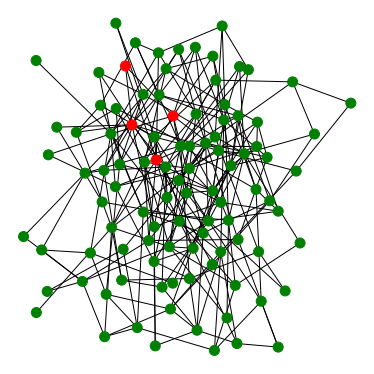

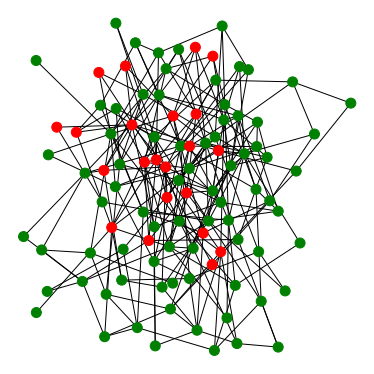

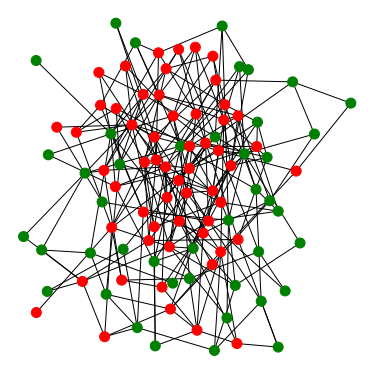

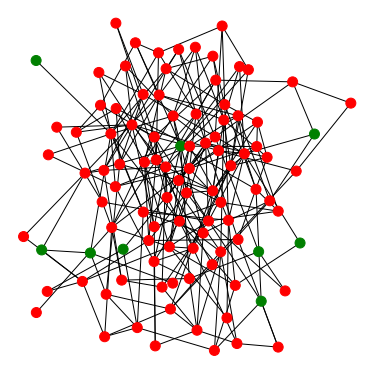

In [6]:
H = nx.erdos_renyi_graph(100,.05)
G=initialize_graph(H)
for _ in range(5):
    plot_spreading(G)
    spread_SI(G,0.8)

In [7]:
# helper function to simulate epidemic and obtain infection rates

def simulate_SI_epidemic(H, steps,beta,attr="state"):
    G=H.copy()
    n_nodes = G.number_of_nodes()
    pct_infected = [1/n_nodes]
    for _ in range(steps):
        spread_SI(G,beta)
        node_states = nx.get_node_attributes(G,attr)
        count_infected = 0
        for node in node_states:
            if node_states[node]==1:
                count_infected+=1
        pct_infected.append(count_infected/n_nodes)
    return pct_infected

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

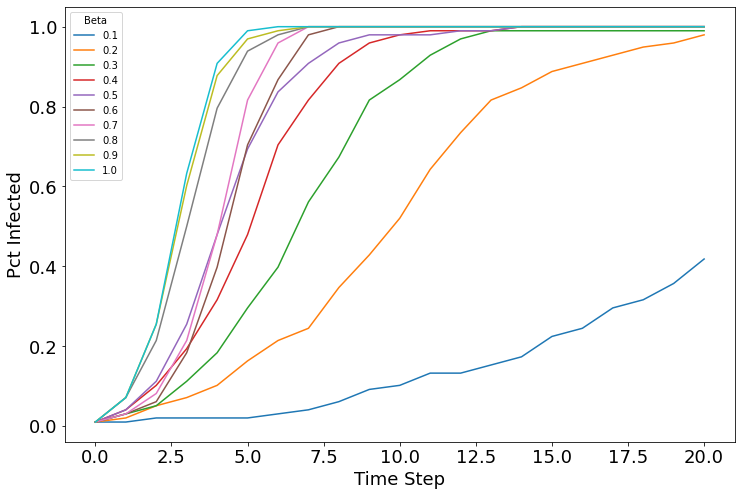

In [8]:
H = nx.erdos_renyi_graph(100,.04)
G=initialize_graph(H)
plt.figure(figsize=(12,8))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_SI_epidemic(G,20,beta),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

### Task 3: Simulating Epidemics on Other Network Models

__a)__ Repeat the analysis from task 2 with a Barabasi-Albert network instead of an Erdos-Renyi network, using $n=200$ nodes and $m = 4$. First visualize the spreading by drawing the network with $\beta = 1$, then plot the percent of infected nodes over time for different values of $\beta$. 

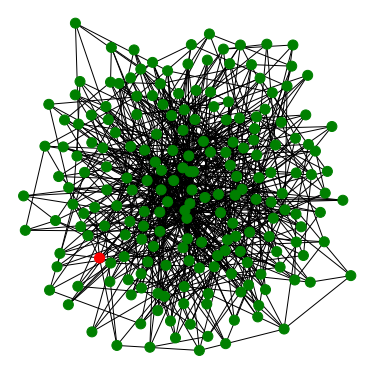

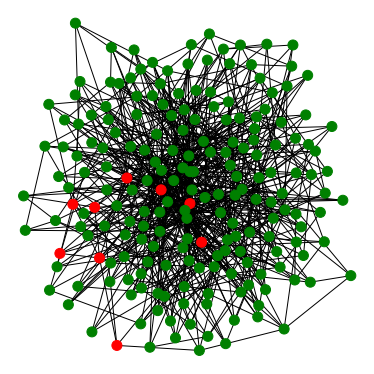

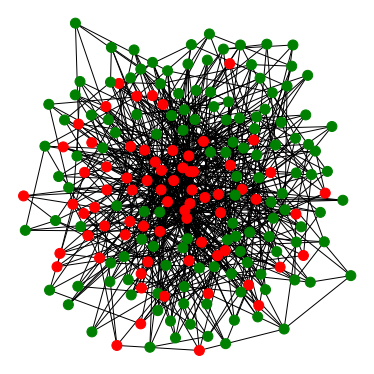

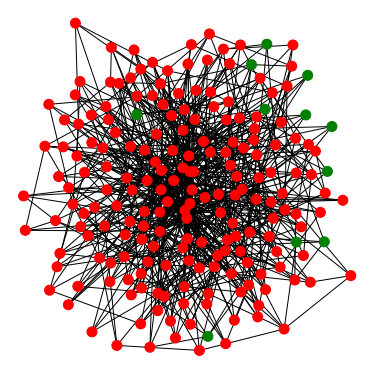

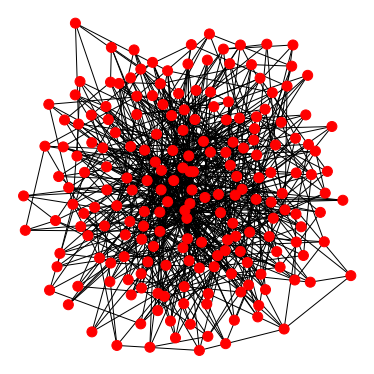

In [9]:
H = nx.barabasi_albert_graph(200,4)
G=initialize_graph(H)
for _ in range(5):
    plot_spreading(G)
    spread_SI(G,0.8)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

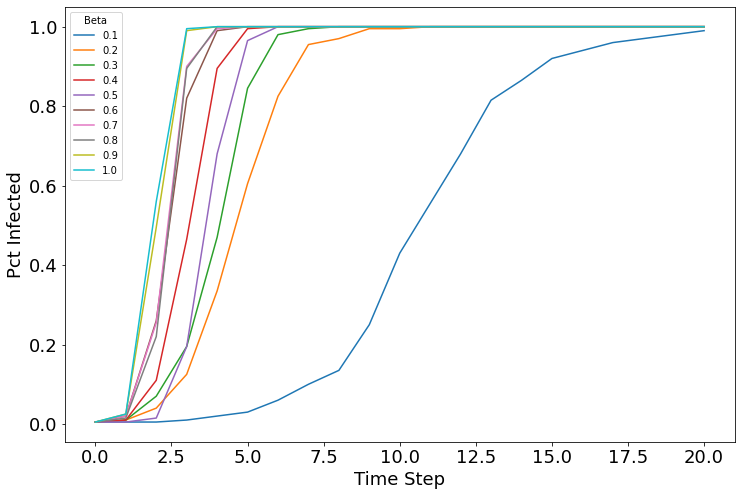

In [10]:
H = nx.barabasi_albert_graph(200,4)
G=initialize_graph(H)
plt.figure(figsize=(12,8))

for beta in np.linspace(.1,1,10):
    plt.plot(simulate_SI_epidemic(G,20,beta),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

__b)__ Repeat the analysis from task 2 with a stochastic block model consisting of two communities of 100 nodes each, with probability of within community edges being 0.05, between community edges probability being 0.001. First visualize the spreading by drawing the network with $\beta = 1$, then plot the percent of infected nodes over time for different betas.

<Figure size 864x576 with 0 Axes>

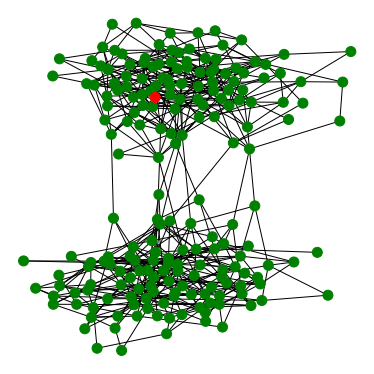

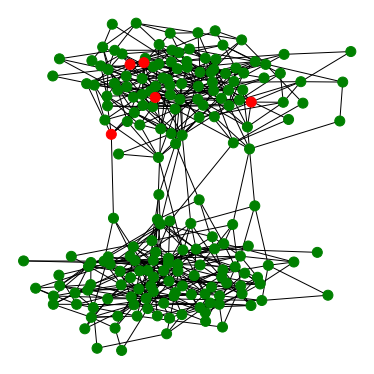

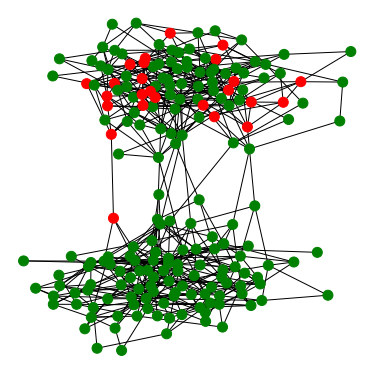

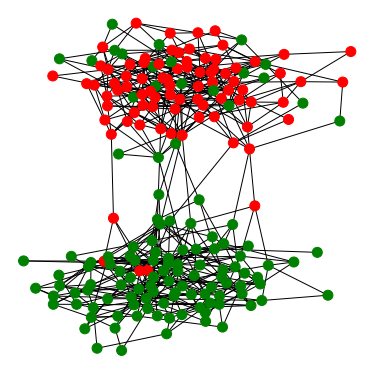

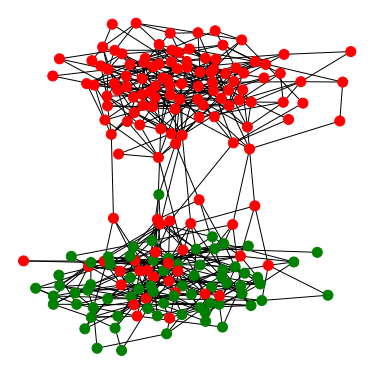

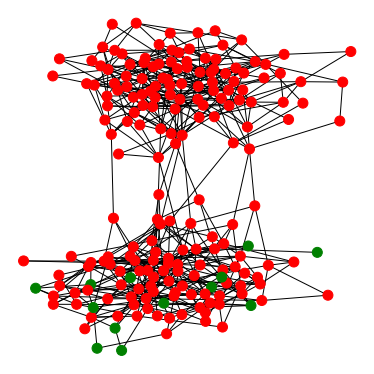

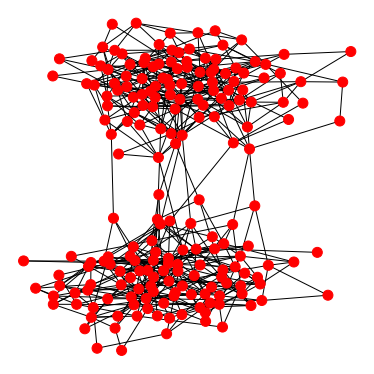

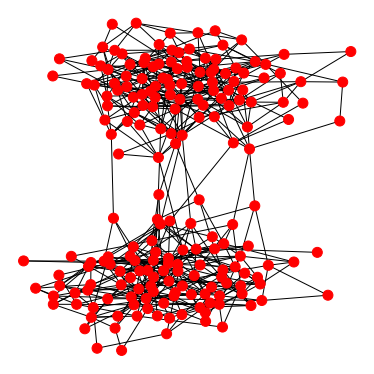

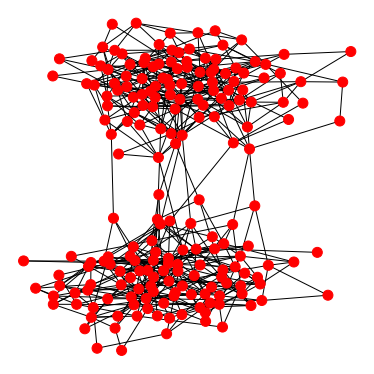

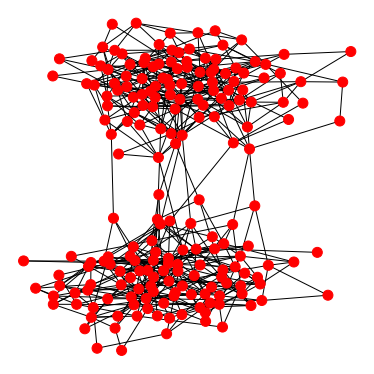

In [11]:
H=nx.stochastic_block_model([100,100],[[.05,.001],[.001,.05]])
G=initialize_graph(H)
plt.figure(figsize=(12,8))
for _ in range(10):
    plot_spreading(G)
    spread_SI(G,1)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

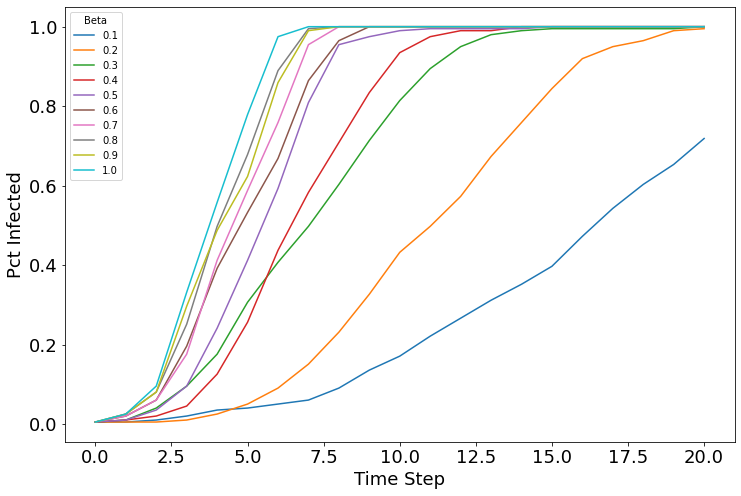

In [12]:
H=nx.stochastic_block_model([100,100],[[.05,.001],[.001,.05]])
G=initialize_graph(H)
plt.figure(figsize=(12,8))

for beta in np.linspace(.1,1,10):
    plt.plot(simulate_SI_epidemic(G,20,beta),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Pct Infected',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)